In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**Problema 1**

Desarrolle una función la cual reciba dos parámetros, una imagen y un entero llamado color, la función debe devolver una imagen la cual tenga activos los canales de color según los siguientes puntos:

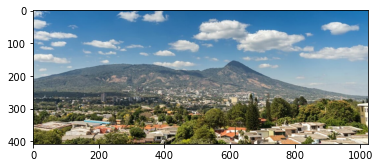

In [30]:
img = cv2.imread('Crater-del-Volcan-de-San-Salvador-1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [31]:
def trasnformacion(img, color):
    alto = img.shape[0]
    ancho = img.shape[1]    
    img_color = ""
    lienzo = np.zeros((alto,ancho, 3)) 
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i,j]
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            if(color == 1):
                lienzo[i,j] = [blue,0,0]
                img_color = "Blue"
            elif(color == 2):
                lienzo[i,j] = [0,green,0]
                img_color = "Green"
            elif(color == 3):
                lienzo[i,j] = [0,0,red]
                img_color = "Red"
            elif(color == 10):
                lienzo[i,j] = [0,green,red]
                img_color = "Red_green"
            elif(color == 20):
                lienzo[i,j] = [blue,green,0]
                img_color = "Green_Blue"
            elif(color == 30):
                lienzo[i,j] = [blue,0,red]
                img_color = "Blue_Red"
                
    cv2.imwrite("color.jpeg", lienzo)
    salida = cv2.imread("color.jpeg")
    salida = cv2.cvtColor(salida, cv2.COLOR_BGR2RGB)
    plt.imshow(salida)

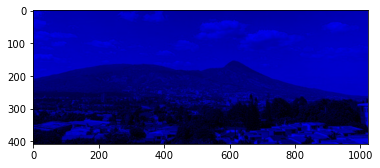

In [32]:
trasnformacion(img,1)

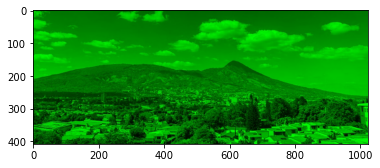

In [33]:
trasnformacion(img,2)

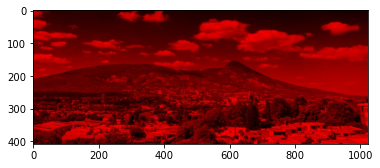

In [34]:
trasnformacion(img,3)

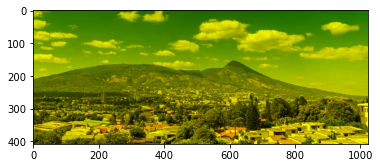

In [35]:
trasnformacion(img,10)

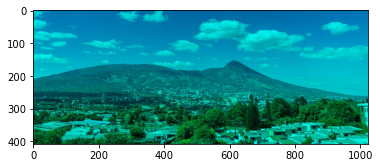

In [36]:
trasnformacion(img,20)

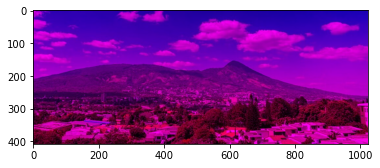

In [37]:
trasnformacion(img,30)

**Problema 2**


En el .zip del laboratorio se le compartió un conjunto de imágenes en escala de grises (imagen1, imagen2, perro) estas imágenes fueron creadas utilizando una escala de grises en 3D, cree una función que dadas las 3 imágenes se construya la imagen original a color.

**Problema 3**

Cree una función que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su función debe crear 3 imágenes como salida. Para entregar este ejercicio debe incluir una las imágenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema 2.

In [59]:
alto = img.shape[0]
ancho = img.shape[1]  
salida1 = np.zeros((alto,ancho,1))
salida2 = np.zeros((alto,ancho,1))
salida3 = np.zeros((alto,ancho,1))
gray_aritmetica = np.zeros((alto,ancho,1))
ponderacion = np.zeros((alto,ancho,1))

for i in range(0,alto):
    for j in range(0,ancho):
        pix = img[i,j]
        ponderacion[i,j] = np.array(int(0.30*pixel[2] + 0.59*pixel[1] + 0.11*pixel[0]))
        salida1[i,j] = pix[2]
        salida2[i,j] = pix[1]
        salida3[i,j] = pix[0]
        

In [60]:
def dimensiones(strImg, arrImg):
    cv2.imwrite(strImg, arrImg)
    out = cv2.imread(strImg)
    out = cv2.cvtColor(out, cv2.COLOR_BGR2RGB)
    plt.imshow(out)

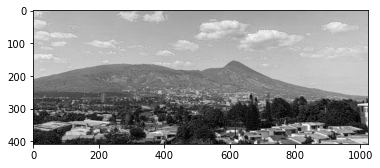

In [61]:
dimensiones("1.jpg",salida1)

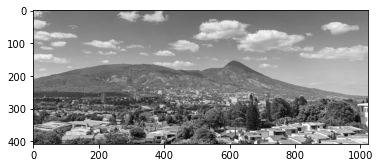

In [62]:
dimensiones("2.jpg",salida2)

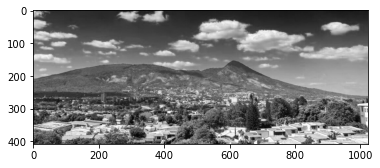

In [63]:
dimensiones("3.jpg",salida3)

**Problema 4**


Cree una función que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmético para su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una línea vertical la cual muestre el valor de la media de la distribución.

In [120]:
def informacion(img):
    color = ('g', 'r', 'b') 
    his = plt.subplots(1)

    
    for i, col in enumerate(color):
        histr = cv2.calcHist([img],[i], None,[256],[0, 256])
        his[1].set_title('Histograma')
        his[1].plot(histr, color = col)

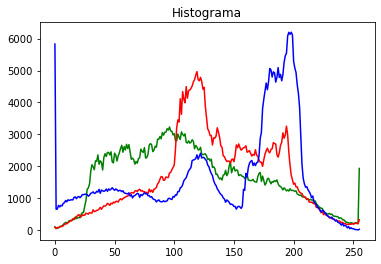

In [121]:
informacion(img)

**Problema 5**


Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una
función que dada una imagen, realice una escala de grises ponderada (notar que no existe una
solución única).

*Escala de grises ponderado*

En los modelos de imagen R, G y B, cuando R = G = B (cuando los valores de los tres componentes de color son iguales), entonces el color representa un color de escala de grises en este momento, donde el valor de R = G = B se denomina valor de escala de grises. En imágenes en escala de grises, los valores de escala de grises también pueden denominarse valores de brillo

La imagen en escala de grises contiene solo un canal. Las intensidades de píxeles en este espacio de color se representan mediante valores que van de 0 a 255. Por lo tanto, el número de posibilidades para un color representado por un píxel es 256.

Debido a que el ojo humano tiene una sensibilidad diferente a cada color, el ojo humano tiene la mayor sensibilidad al verde y la menor sensibilidad al azul, por lo que podemos usar el método de promedio ponderado para encontrar el valor de gris, la fórmula es la siguiente:

f(x,y)=a_iR(i,j)+b_iG(i,j)+c_iB(i,j) f(x,y)=ai​R(i,j)+bi​G(i,j)+ci​B(i,j)

Fuentes:

https://es.acervolima.com/python-visualizacion-de-imagenes-en-diferentes-espacios-de-color/

https://programmerclick.com/article/23061330684/

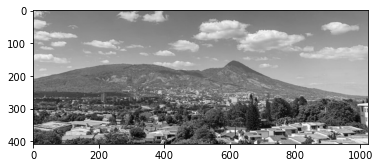

In [19]:
img_gray("ponderado.jpg",gray_ponderado)

**Problema 6**

Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio, para entregar este ejercicio puede hacerlo por medio de Markdown en el mismo Notebook donde trabajó los demás ejercicios.

*Espacio de color HSV*

Representación tridimensional del color basado en los componentes de tinte, matiz o tonalidad (hue, en inglés), saturación (saturation) y brillo o valor (value).

A diferencia del modelo RGB ampliamente usado en los monitores, televisores, etc., si bien las coordenadas de aquel son euclideanas; el color HSV sigue una representación más parecida a las coordenadas cilíndricas. Además es una representación más cercana a la forma en que los humanos perciben los colores y sus propiedades, pues se agrupan las tonalidades de color, lo cual es distinto al caso RGB donde los colores no están necesariamente tan agrupados.

Se puede definir las siglas **HSV** como:

H: Hue representa la longitud de onda dominante.

S: La saturación representa tonos de color.

V: el valor representa la intensidad.


Para procesarlas en Python con OpenCV se realiza de la siguiente manera:

Leer la imagen de nuestro repositorio

**img = cv2.imread('myimage.jpg')**

Convertir la imagen de BRG a RGB

**img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)**

Convertir la imagen de RGB a HSV con el codigo

**img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)**


**Fuentes:**
https://www.ecured.cu/Modelo_HSV

https://stackoverflow.com/questions/2612361/convert-rgb-values-to-equivalent-hsv-values-using-python
